In [1]:
import pandas as pd
import numpy as np
from IPython import display

In [2]:
df = pd.DataFrame([[10,20,30,40],
                   [50,60,70,80],
                   [90,100,110,120]],
                   index=list('xyz'),
                   columns=list('abcd'))
df

,a,b,c,d
x,10,20,30,40
y,50,60,70,80
z,90,100,110,120


In [3]:
df[['a','c']]

,a,c
x,10,30
y,50,70
z,90,110


In [4]:
df.loc['y']

a    50
b    60
c    70
d    80
Name: y, dtype: int64

In [5]:
df.loc[['y', 'z']]

,a,b,c,d
y,50,60,70,80
z,90,100,110,120


In [6]:
df

,a,b,c,d
x,10,20,30,40
y,50,60,70,80
z,90,100,110,120


In [7]:
df['x':'y'] # This slice, pandas will look at the data frame's rows.

,a,b,c,d
x,10,20,30,40
y,50,60,70,80


In [8]:
df.a # Another way to work with columns is to use de dot notation.

x    10
y    50
z    90
Name: a, dtype: int64

In [9]:
df = pd.DataFrame(
    {
        'v': [10, 60, 110, 160, 210],
        'w': [20, 70, 120, 170, 220],
        'x': [30, 80, 130, 180, 230],
        'y': [40, 90, 140, 190, 240],
        'z': [50, 100, 150, 200, 250]
    },
    index = list('abcde')
)

In [10]:
df

,v,w,x,y,z
a,10,20,30,40,50
b,60,70,80,90,100
c,110,120,130,140,150
d,160,170,180,190,200
e,210,220,230,240,250


In [11]:
df.loc['e', 'z'] #['Row selector', 'Column selector']

np.int64(250)

In [12]:
df.loc['a',    #['Row selector', 'Column selector']
        'x']

np.int64(30)

In [13]:
df.loc[['b','c']
       ,'x']

b     80
c    130
Name: x, dtype: int64

In [14]:
df.loc[['b', 'c', 'd']
       ,'z']

b    100
c    150
d    200
Name: z, dtype: int64

In [15]:
df.loc[['b', 'c', 'd']
       ,['z', 'v']]

,z,v
b,100,60
c,150,110
d,200,160


In [16]:
df.loc[['a', 'c'], ['v', 'y']]

,v,y
a,10,40
c,110,140


But wait, it gets even better: we can describe rows using a boolean index

In [17]:
df['x']

a     30
b     80
c    130
d    180
e    230
Name: x, dtype: int64

In [18]:
df['x'] > 200

a    False
b    False
c    False
d    False
e     True
Name: x, dtype: bool

In [19]:
df.loc[df['x'] > 200]

,v,w,x,y,z
e,210,220,230,240,250


In [20]:
df.loc['c'] > 135

v    False
w    False
x    False
y     True
z     True
Name: c, dtype: bool

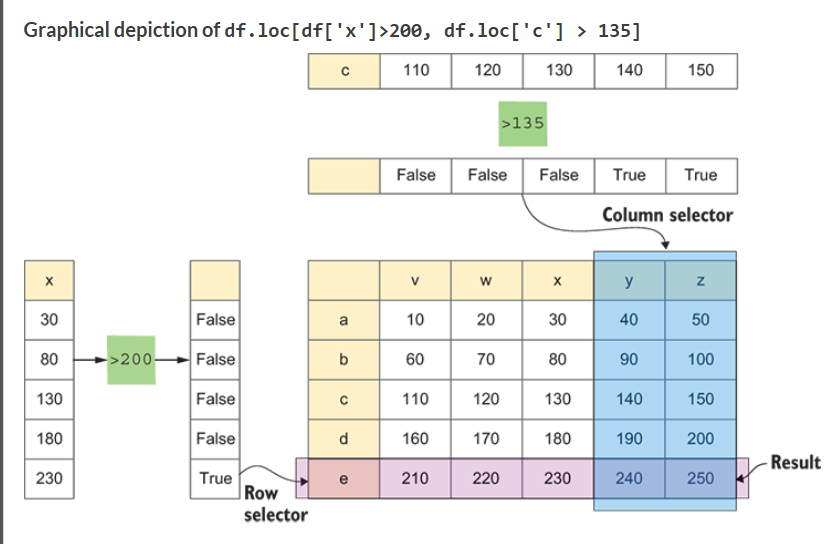

In [21]:
display.Image('images\\Screenshot 2025-09-01 171523.png')

In [22]:
df

,v,w,x,y,z
a,10,20,30,40,50
b,60,70,80,90,100
c,110,120,130,140,150
d,160,170,180,190,200
e,210,220,230,240,250


In [23]:
df.loc[df['x'] > 200, df.loc['c'] > 135]  # Row selector, Column selector

,y,z
e,240,250


In [24]:
df.loc[df['x'] > 50, df.loc['b'] > 80]

,y,z
b,90,100
c,140,150
d,190,200
e,240,250


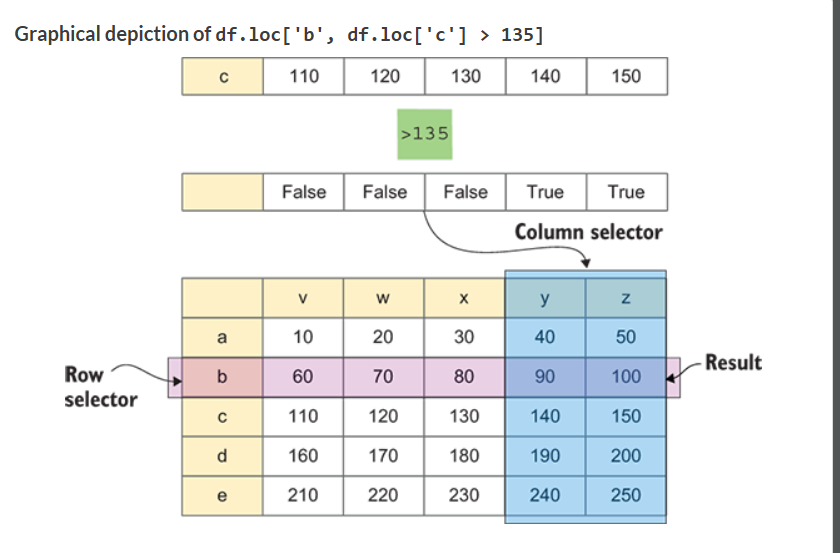

In [25]:
display.Image('images\\Screenshot 2025-09-01 174501.png')

In [26]:
df.loc['b', df.loc['c']>135]

y     90
z    100
Name: b, dtype: int64

Of course, our conditions can be far more complex than these. But `as long as you keep in mind that you want to select based on rows before the comma and based on columns after the comma, you should be fine.`

In [27]:
df.loc['b', 'y'] = 580
df

,v,w,x,y,z
a,10,20,30,40,50
b,60,70,80,580,100
c,110,120,130,140,150
d,160,170,180,190,200
e,210,220,230,240,250


What if we want to set new values in row b, where row c is greater than 125?

In [28]:
df.loc['b', df.loc['c'] > 125]

x     80
y    580
z    100
Name: b, dtype: int64

In [30]:
df.loc['b', df.loc['c'] > 125] = [123, 456, 789]

In [31]:
df

,v,w,x,y,z
a,10,20,30,40,50
b,60,70,123,456,789
c,110,120,130,140,150
d,160,170,180,190,200
e,210,220,230,240,250


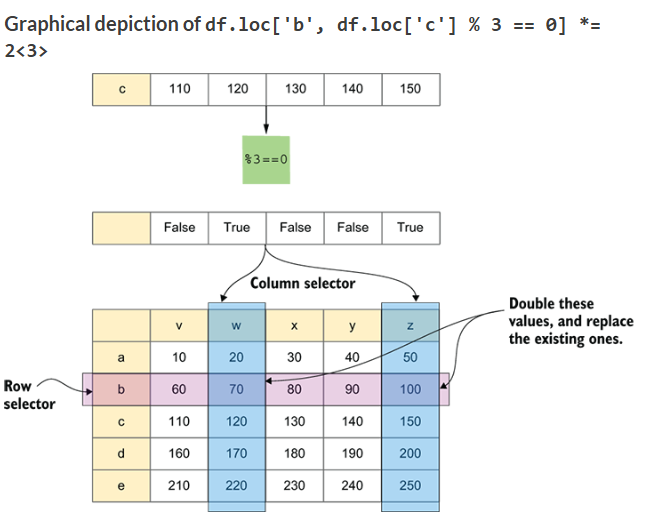

In [32]:
display.Image('images\\Screenshot 2025-09-01 231818.png')

In [34]:
df.loc['b', df.loc['c'] % 3 == 0] *= 2

In [35]:
df

,v,w,x,y,z
a,10,20,30,40,50
b,60,140,123,456,1578
c,110,120,130,140,150
d,160,170,180,190,200
e,210,220,230,240,250


We can assign a scalar value to the elements described by **loc**

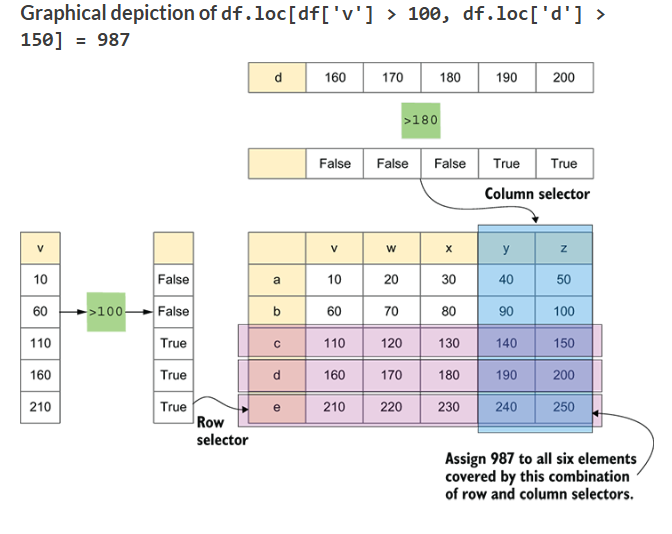

In [36]:
display.Image('images\\Screenshot 2025-09-01 232358.png')

In [45]:
df.loc[df['v'] > 100, df.loc['d'] > 180] = 987

In [46]:
df

,v,w,x,y,z
a,10,20,30,40,50
b,60,140,123,456,1578
c,110,120,130,987,987
d,160,170,180,987,987
e,210,220,230,987,987
